In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Data cleaning 
I first read in the data set about seattle crime incidents in summer 2014

In [3]:
# read in the data file
df_st = pd.read_csv('seattle_incidents_summer_2014.csv' )

/Users/huikuanchao/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In this step, The dataframe df_st is pivoted to achieve the new colunms offering the time information inclusing date, hour and catagorial information about the incidents' crime type 

In [4]:
# convert the date reported colunme from string type to datetime type 
date_report_ind = pd.DatetimeIndex(df_st['Date Reported'])
df_st['rp_date'] = date_report_ind.date.astype('datetime64')
df_st['rp_hour'] = date_report_ind.hour
df_st['Is_night'] = (date_report_ind.hour > 20) | (date_report_ind.hour < 6)

In [5]:
area_ind = df_st['District/Sector'].loc[df_st['District/Sector'].notnull()].unique()
df_st['ofns_tp_rdc'] = map(lambda x : x.split('-')[0], df_st['Offense Type']) 
offens_ind = df_st['ofns_tp_rdc'].unique()


# Data Analysis 

I fristly looked at how the mean value of crime incidents accross all the crime types changes as a function of hours in a day.

In [6]:
hourly = df_st.pivot_table('RMS CDW ID', aggfunc='count',index=['rp_date'], columns=['rp_hour'])

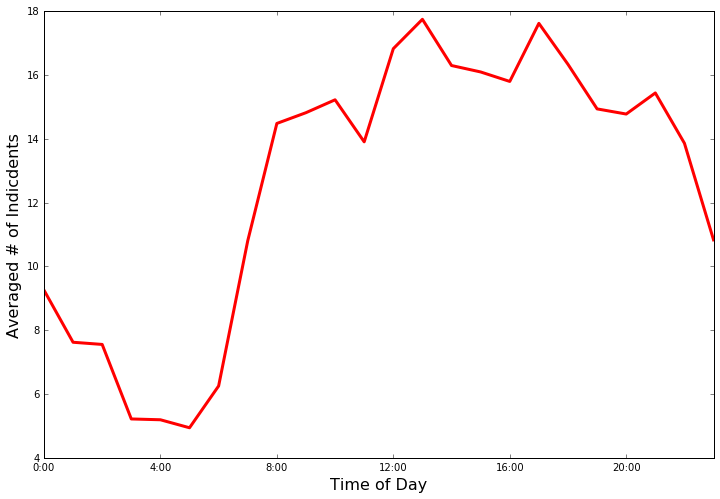

In [7]:
%matplotlib inline
fmt = plt.FuncFormatter(lambda x, *args: '{0}:00'.format(int(x)))
fig, ax = plt.subplots(1,1, figsize=(12, 8), sharex=True, sharey=True)
#plt.plot(hourly.mean(0))
ax.set_xlim(0, 23)
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.plot(range(24),hourly.mean(0), color='Red', lw=3)
ax.xaxis.set_major_formatter(fmt)
ax.set_xlabel('Time of Day',size=16)
ax.set_ylabel('Averaged # of Indicdents',size=16)

The results shown in the about exhibits a highly nonlinear pattern in the curve, where the number of indicendts drops siginifcantly in the mornning after the sunrise while the number also shows a sharp increase at around 12:00pm and then plateaus at the level unitl the night.

## The effect of day and night
In the following section, I further studies what are the incidents distributed accross the crime types. First, I look at the incidents happed during daytime.

In [8]:
type_nt_day = df_st.pivot_table('RMS CDW ID', aggfunc='count',index=['ofns_tp_rdc'], columns=['Is_night'])

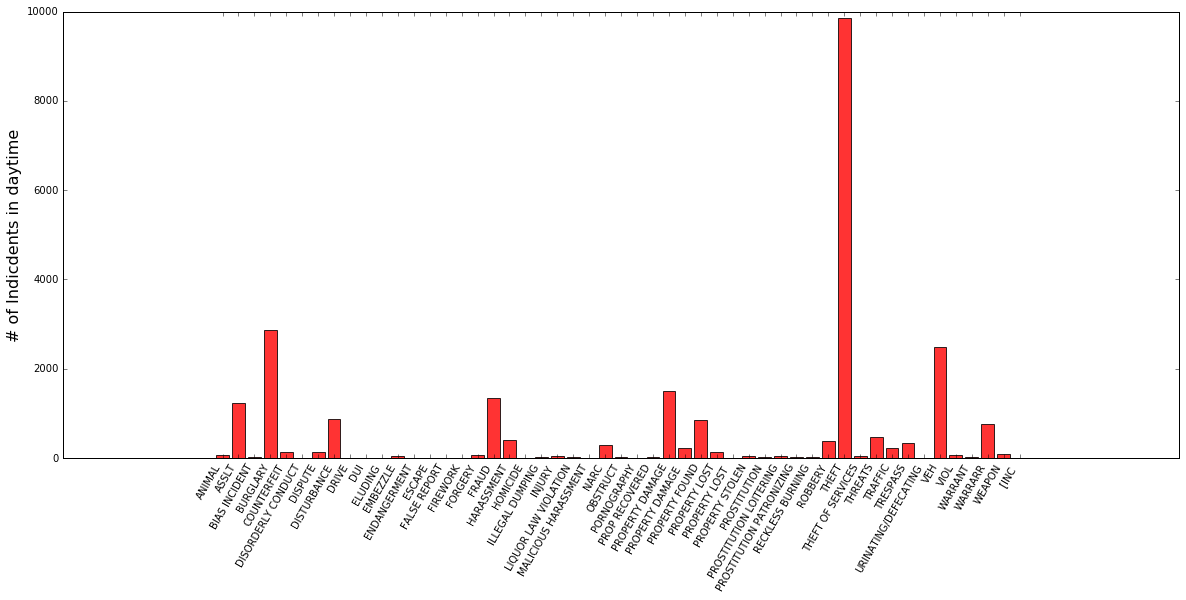

In [9]:
#plot # of incidents vs. incidents type for both day and night periods
fig, ax = plt.subplots(1,1, figsize=(20, 8))
day_incid_type = np.nan_to_num(type_nt_day[False].values.T)
ax.bar(range(day_incid_type.size), day_incid_type, color='r', alpha=0.8,align='center')
ax.set_xticks(range(type_nt_day.index.size))
ax.set_xticklabels(type_nt_day.index,ha="right",rotation=60)
ax.set_ylabel('# of Indicdents in daytime',size=16)
#for c, y in zip(['r', 'b'], [False, True]):
#     xs = np.arange(20)
#     ax.bar(offens_ind, y, type_nt_day[y].values.T, zdir='y', color=c, alpha=0.8)

As the figure shown above, the indicients distributed accross the types of crime in hight non-uniform manner. Specifficaly, we observed that theft and burglary are the top two frenqunent crime types. 

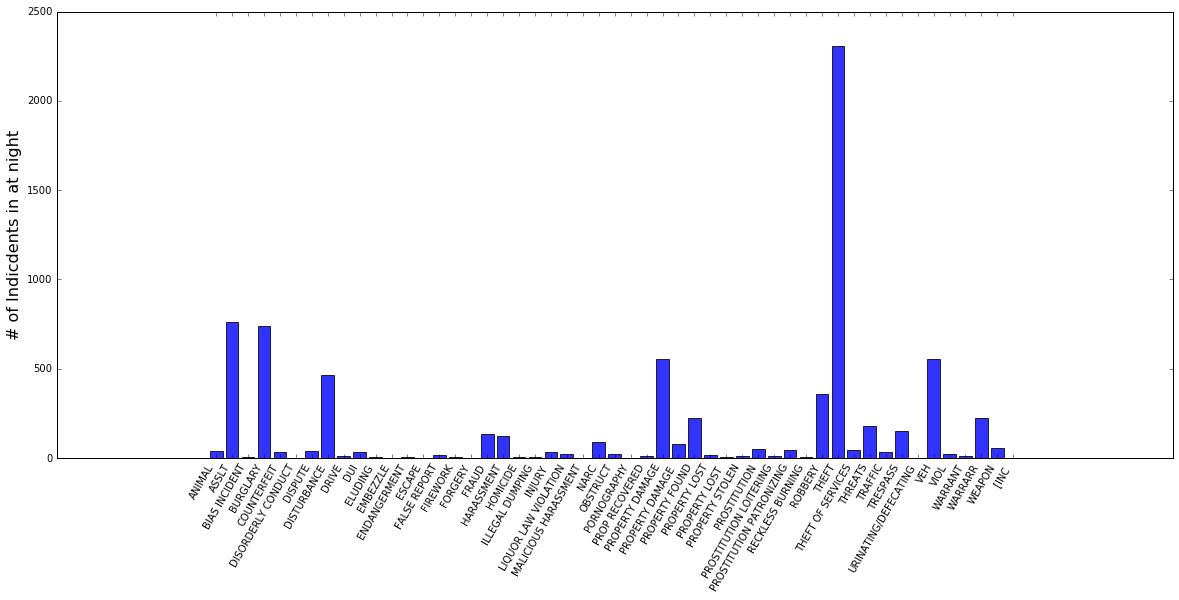

In [10]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))
night_incid_type = np.nan_to_num(type_nt_day[True].values.T)
ax.bar(range(night_incid_type.size), night_incid_type, color='b', alpha=0.8,align='center')
ax.set_xticks(range(type_nt_day.index.size))
ax.set_xticklabels(type_nt_day.index,ha="right",rotation=60)
ax.set_ylabel('# of Indicdents in at night',size=16)


However, at night, the above figure shown that despit the theft still being the most frequent type of the crime, now assult becomes the second most frequent type. At the same time, we do recognized that the amount of burglary incidents is only margnial smaller than that of the assult incidents.

## Types of crime in different districts
Next, I'd like to explore how the type of indicents differs across districts in Seattle. 

In [11]:
df_corrt_dist = df_st.loc[df_st['District/Sector'].notnull()]

In [12]:
type_dist = df_corrt_dist.pivot_table('RMS CDW ID', aggfunc='count',index=['District/Sector'], columns=['ofns_tp_rdc'])

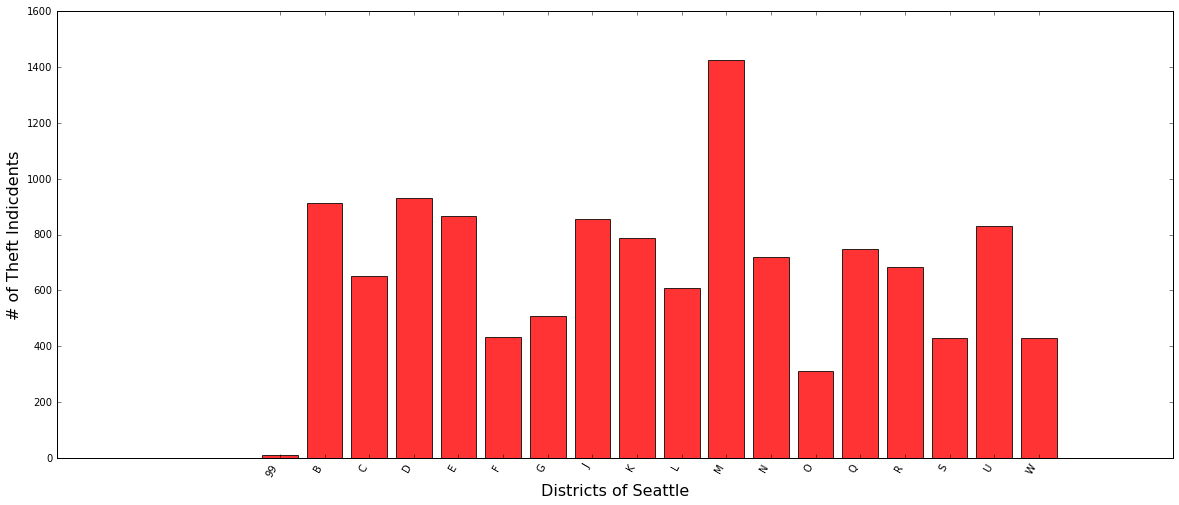

In [13]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))
cent_type = np.nan_to_num(type_dist['THEFT'].values.T)
ax.bar(range(cent_type.size), cent_type, color='r', alpha=0.8,align='center')
ax.set_xticks(range(type_dist.index.size))
ax.set_xticklabels(type_dist.index,ha="right",rotation=60)
ax.set_ylabel('# of Theft Indicdents',size=16)
ax.set_xlabel('Districts of Seattle',size=16)


We investigate the distribution of theft indicents. The above figure suggests that for the center city (distric M) the number of theft incidents clearly shows a much higher value comparing with the values in other disricts, for example the district form the south area  (district O,W and F ) and north area (district L).

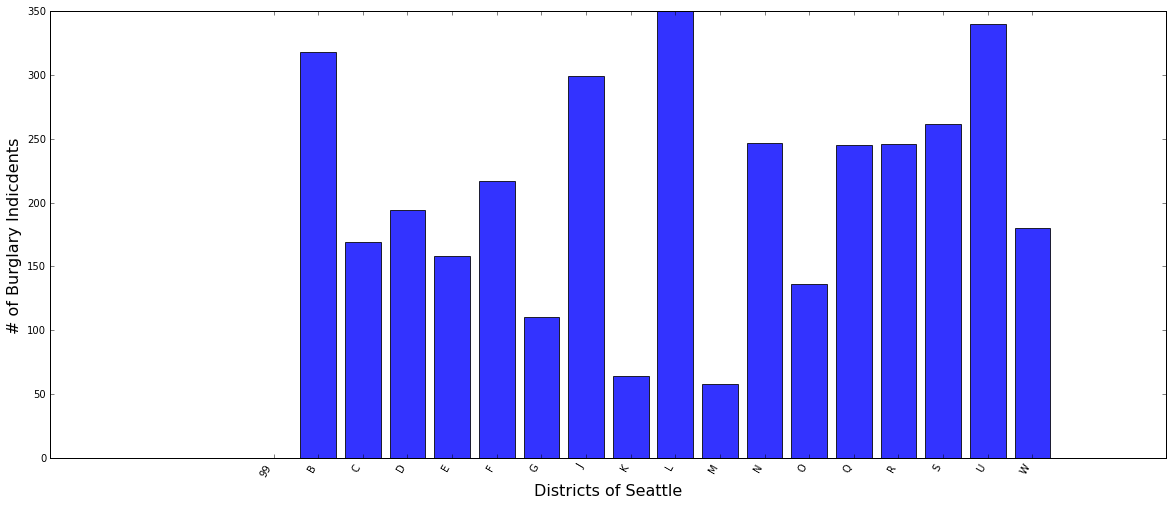

In [14]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))
cent_type = np.nan_to_num(type_dist['BURGLARY'].values.T)
ax.bar(range(cent_type.size), cent_type, color='B', alpha=0.8,align='center')
ax.set_xticks(range(type_dist.index.size))
ax.set_xticklabels(type_dist.index,ha="right",rotation=60)
ax.set_ylabel('# of Burglary Indicdents',size=16)
ax.set_xlabel('Districts of Seattle',size=16)


Neverthless, the situation becomes quite different if we looked at the same distribution but of the burglary incidents. The figure in the above shows that the number of burglary is indeed reaches minimun in the center city (M) while reaches its highest value in the north area (L). 

## Crime incidents changes during the summer  

Finally, I've looked at how the crime incidents change during the summer. 

In [15]:
df_st['rp_month'] = date_report_ind.month
monthly = df_st.pivot_table('RMS CDW ID', aggfunc='count',index=['rp_month'], columns=['ofns_tp_rdc'])

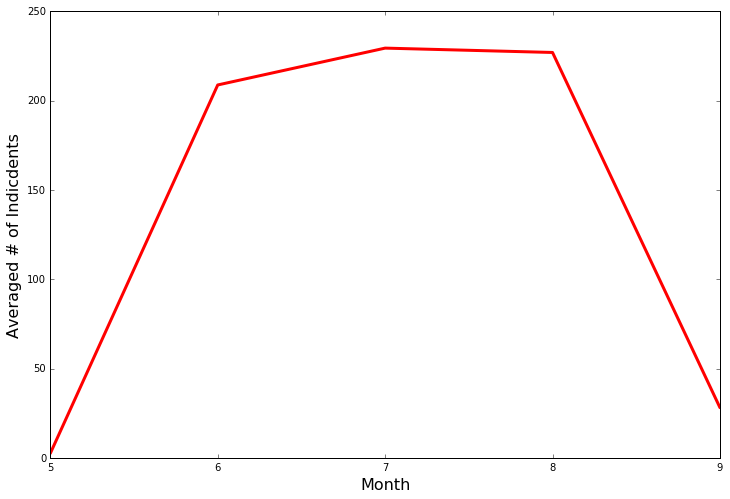

In [16]:
%matplotlib inline
fmt = plt.FuncFormatter(lambda x, *args: '{0}:00'.format(int(x)))
fig, ax = plt.subplots(1,1, figsize=(12, 8), sharex=True, sharey=True)
#plt.plot(hourly.mean(0))
ax.set_xlim(5, 9)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.plot(monthly.index, monthly.mean(1), color='Red', lw=3)
#ax.xaxis.set_major_formatter(fmt)
ax.set_xlabel('Month',size=16)
ax.set_ylabel('Averaged # of Indicdents',size=16)

The above reuslts on the mean value of incident across different crime types as a function of months during the summer shows that July and August in the summer has the highest number of incidents. Yet, the number drop at both the beginning and the end of the summer.

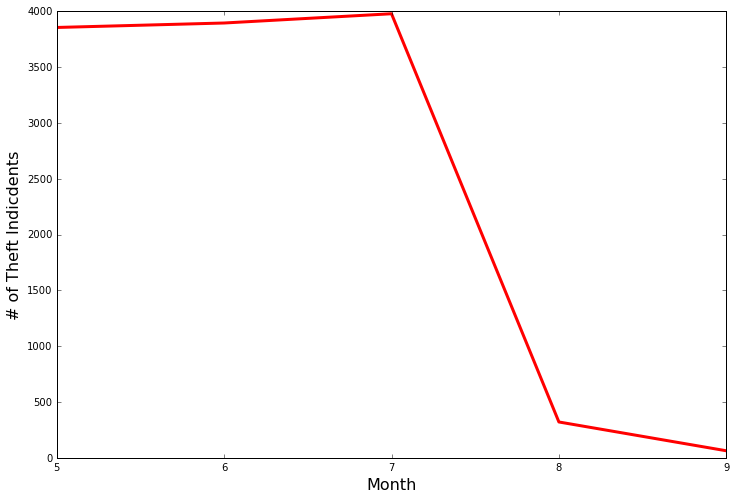

In [17]:
%matplotlib inline
fmt = plt.FuncFormatter(lambda x, *args: '{0}:00'.format(int(x)))
Theft_month = np.nan_to_num(monthly['THEFT'].values.T)
fig, ax = plt.subplots(1,1, figsize=(12, 8), sharex=True, sharey=True)
#plt.plot(hourly.mean(0))
ax.set_xlim(5, 9)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.plot(Theft_month, color='Red', lw=3)
#ax.xaxis.set_major_formatter(fmt)
ax.set_xlabel('Month',size=16)
ax.set_ylabel('# of Theft Indicdents',size=16)

However, If we chose to look at a specific type of crime, the situation might become slight different. For example, the above figure shows the same function for Theft, which exhibit a hight vlaue at both the begninning and middle of summer whil 

In [127]:
byday = df_st.pivot_table('RMS CDW ID', aggfunc='count',index=['rp_date'], columns=['ofns_tp_rdc'])

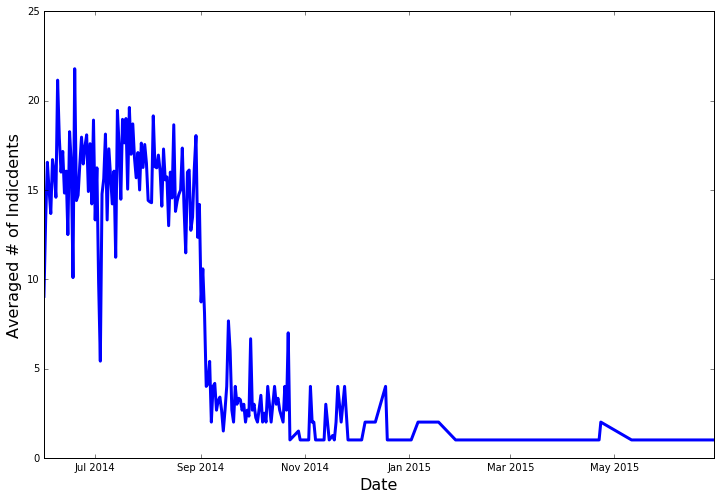

In [135]:
%matplotlib inline
fmt = plt.FuncFormatter(lambda x, *args: '{0}:00'.format(int(x)))
fig, ax = plt.subplots(1,1, figsize=(12, 8), sharex=True, sharey=True)
#plt.plot(hourly.mean(0))
#ax.set_xlim(5, 9)
#ax.xaxis.set_major_locator(plt.MultipleLocator(100))
ax.plot( byday.mean(1), color='B', lw=3)
#ax.xaxis.set_major_formatter(fmt)
ax.set_xlabel('Date',size=16)
ax.set_ylabel('Averaged # of Indicdents',size=16)